<a href="https://colab.research.google.com/github/ganeshsembedded-maker/Decision-Tree-Classification-ML/blob/main/Irrigation_Need_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# ===============================
# 1. IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier


In [22]:
# ===============================
# 2. LOAD DATASET
# ===============================
data = pd.read_csv('/content/irrigation_prediction.csv')
df = data.copy()

display(df.head())
df.info()


,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,Wheat,Vegetative,Rabi,Rainfed,Reservoir,4.73,Yes,1.98,South,Low
1,Silt,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,Maize,Flowering,Zaid,Canal,Groundwater,12.22,Yes,33.56,Central,Medium
2,Sandy,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,Cotton,Harvest,Rabi,Drip,Reservoir,5.52,Yes,34.62,South,Low
3,Clay,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,Wheat,Sowing,Kharif,Canal,Reservoir,1.43,Yes,84.03,North,Medium
4,Clay,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,Cotton,Sowing,Zaid,Canal,River,2.52,No,60.86,South,Medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Soil_Type                10000 non-null  object 
 1   Soil_pH                  10000 non-null  float64
 2   Soil_Moisture            10000 non-null  float64
 3   Organic_Carbon           10000 non-null  float64
 4   Electrical_Conductivity  10000 non-null  float64
 5   Temperature_C            10000 non-null  float64
 6   Humidity                 10000 non-null  float64
 7   Rainfall_mm              10000 non-null  float64
 8   Sunlight_Hours           10000 non-null  float64
 9   Wind_Speed_kmh           10000 non-null  float64
 10  Crop_Type                10000 non-null  object 
 11  Crop_Growth_Stage        10000 non-null  object 
 12  Season                   10000 non-null  object 
 13  Irrigation_Type          10000 non-null  object 
 14  Water_Source           

In [23]:
# ===============================
# 3. BASIC EDA
# ===============================
display(df.describe())
print(df.isnull().sum())


,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Field_Area_hectare,Previous_Irrigation_mm
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.487857,36.969207,0.944731,1.791963,26.991423,60.080339,1252.499420,7.518538,10.163545,7.598024,59.864122
std,0.979963,16.430845,0.372406,0.984202,8.664074,20.187973,715.582201,2.016077,5.670923,4.233919,34.483722
min,4.800000,8.000000,0.300000,0.100000,12.000000,25.000000,0.380000,4.000000,0.500000,0.300000,0.020000
25%,5.640000,22.860000,0.620000,0.940000,19.460000,42.855000,634.155000,5.760000,5.160000,3.950000,30.160000
50%,6.470000,37.240000,0.950000,1.780000,27.090000,60.040000,1250.335000,7.560000,10.190000,7.540000,59.630000
75%,7.350000,50.940000,1.260000,2.650000,34.500000,77.705000,1880.265000,9.260000,15.100000,11.202500,90.030000
max,8.200000,65.000000,1.600000,3.500000,42.000000,95.000000,2499.690000,11.000000,20.000000,15.000000,119.990000


Soil_Type                  0
Soil_pH                    0
Soil_Moisture              0
Organic_Carbon             0
Electrical_Conductivity    0
Temperature_C              0
Humidity                   0
Rainfall_mm                0
Sunlight_Hours             0
Wind_Speed_kmh             0
Crop_Type                  0
Crop_Growth_Stage          0
Season                     0
Irrigation_Type            0
Water_Source               0
Field_Area_hectare         0
Mulching_Used              0
Previous_Irrigation_mm     0
Region                     0
Irrigation_Need            0
dtype: int64


In [24]:
# ===============================
# 4. SPLIT NUMERICAL & CATEGORICAL DATA
# ===============================
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


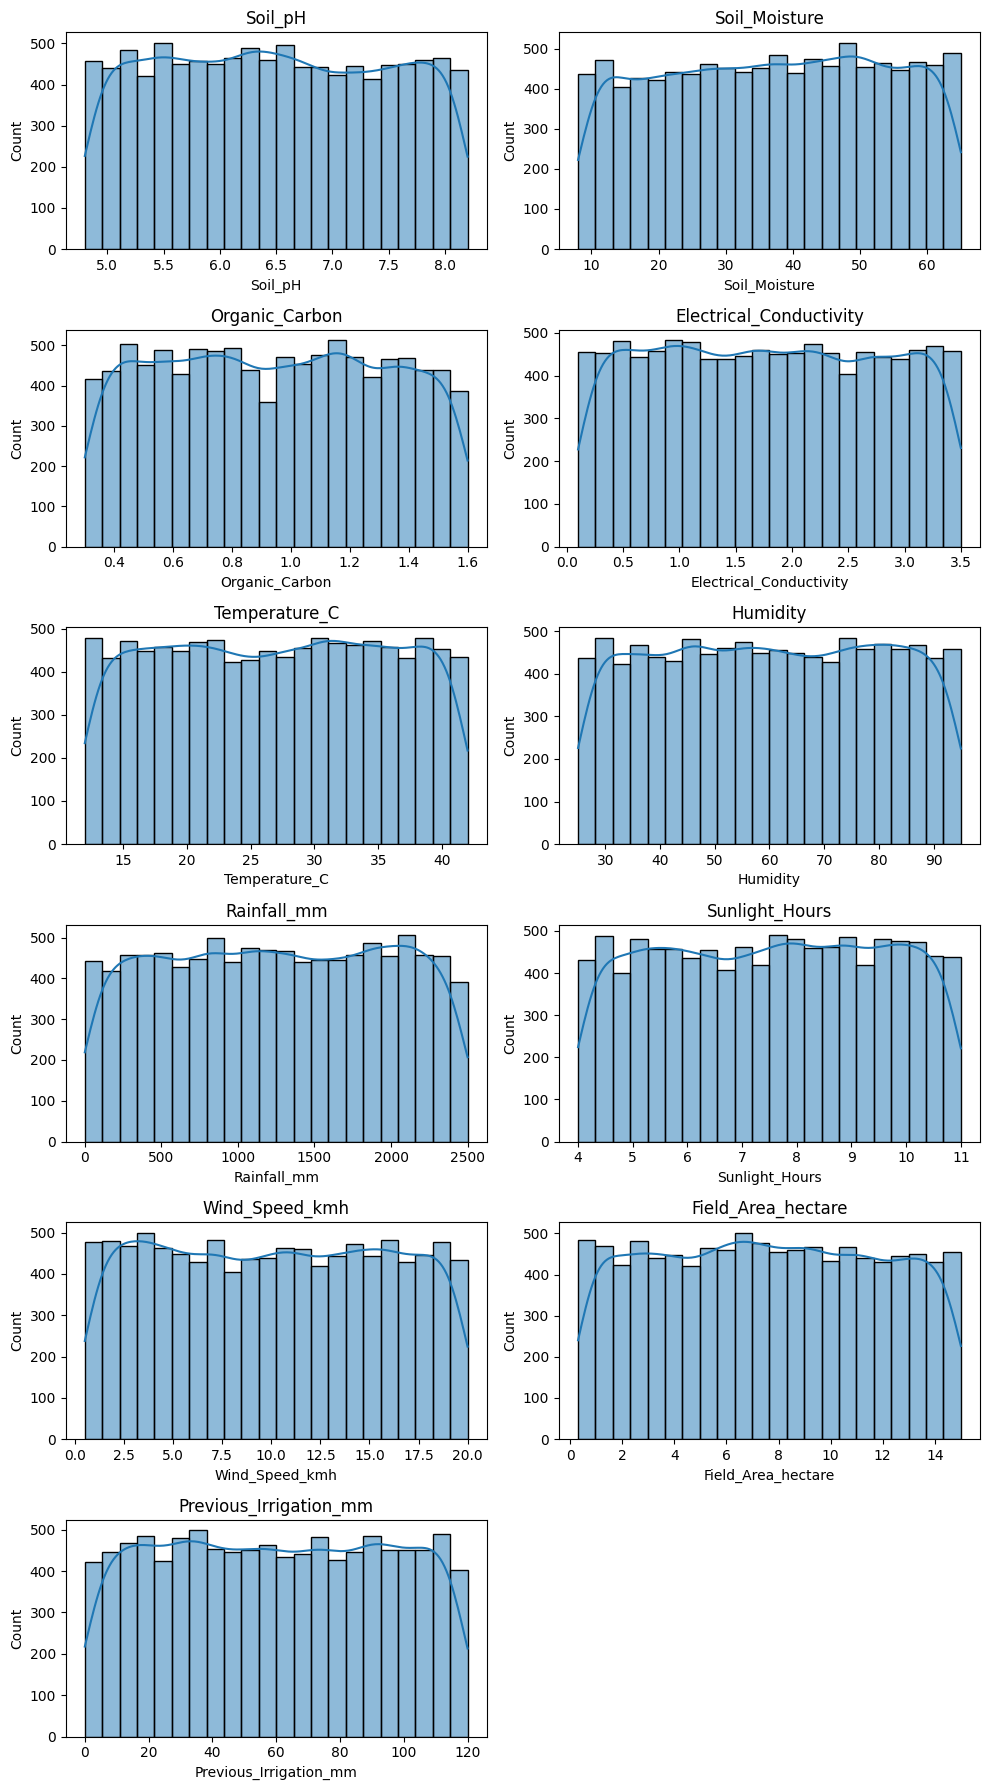

In [25]:
# ===============================
# 5. NUMERICAL DATA VISUALIZATION
# ===============================
n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(10, 3*n_rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


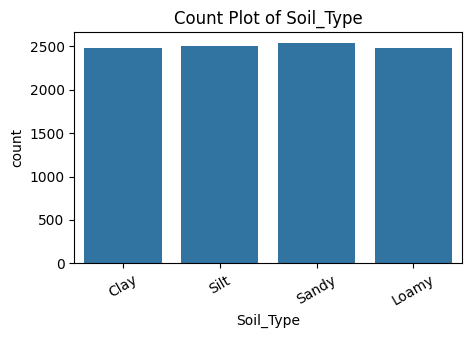

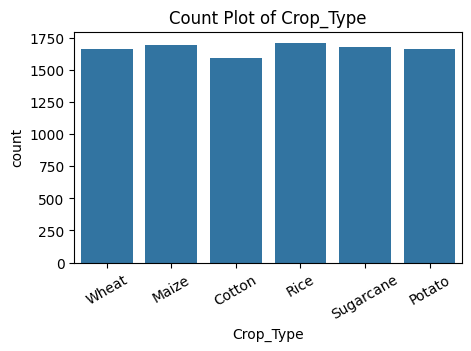

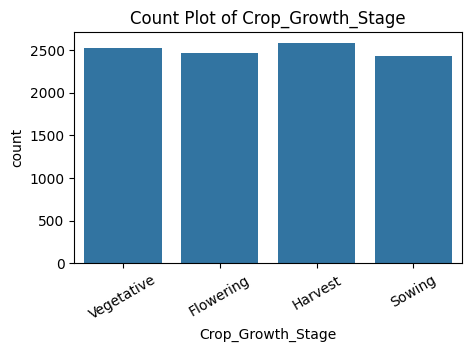

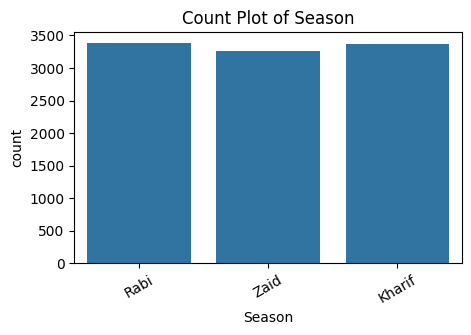

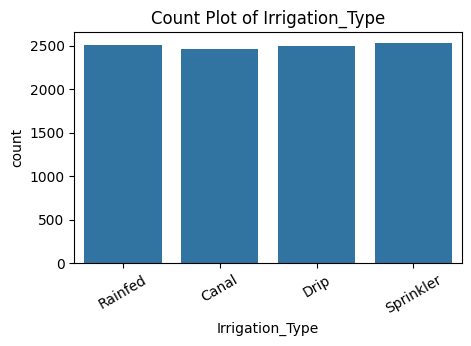

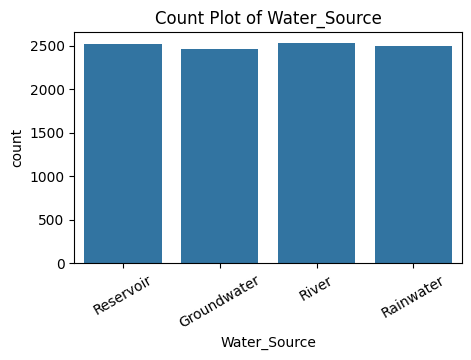

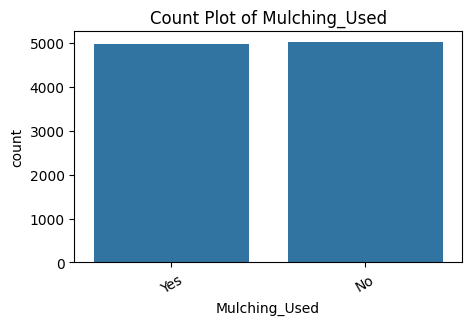

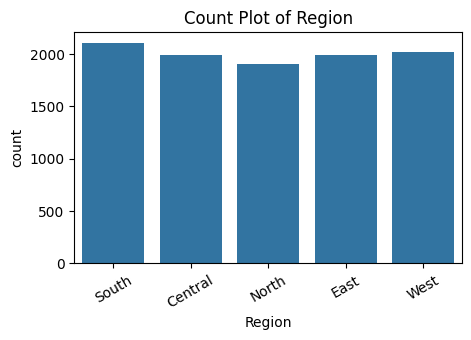

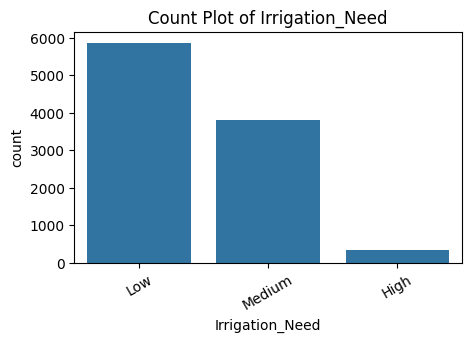

In [26]:
# ===============================
# 6. CATEGORICAL DATA VISUALIZATION
# ===============================
for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=30)
    plt.show()


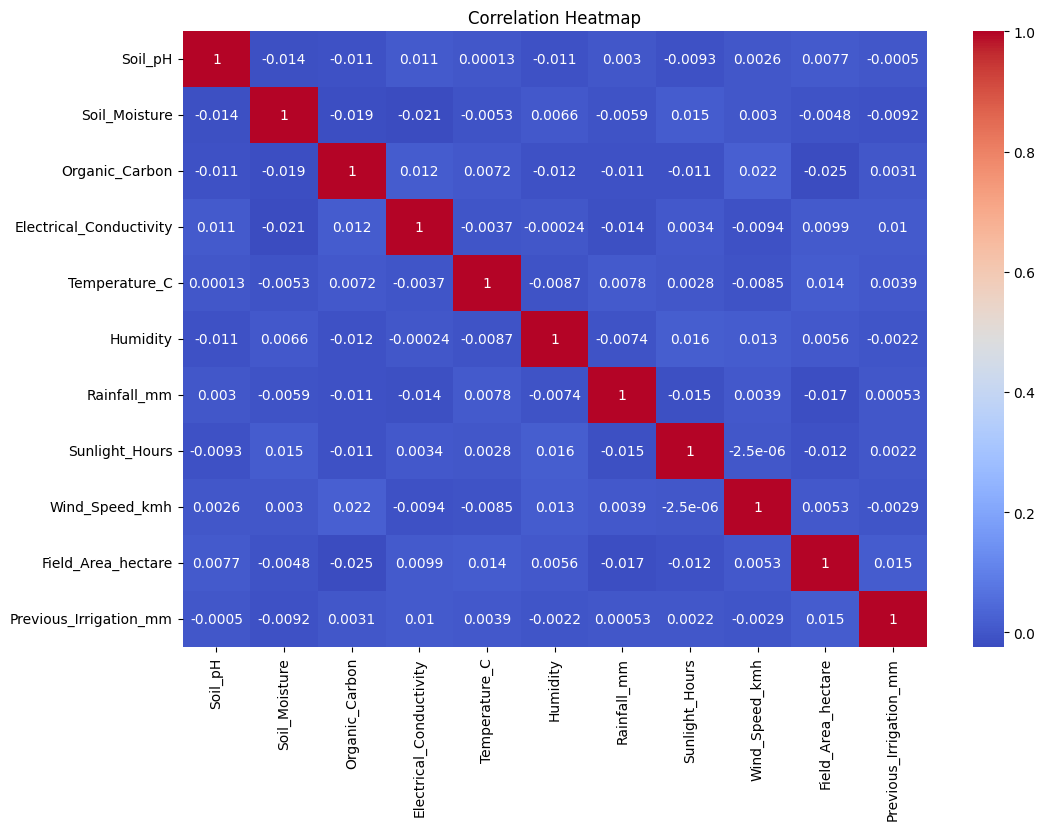

In [27]:
# ===============================
# 7. CORRELATION HEATMAP
# ===============================
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [28]:
# ===============================
# 8. LABEL ENCODING (ONLY CATEGORICAL)
# ===============================
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [29]:
# ===============================
# 9. FEATURE & TARGET SPLIT
# ===============================
X = df.drop('Irrigation_Need', axis=1)
y = df['Irrigation_Need']


In [30]:
# ===============================
# 10. TRAIN TEST SPLIT
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [31]:
# ===============================
# 11. FEATURE SCALING
# ===============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
# ===============================
# 12. MODEL DEFINITIONS (OVERFITTING CONTROL)
# ===============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_split=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}


In [33]:
# ===============================
# 13. MODEL TRAINING & ACCURACY
# ===============================
results = {}

for name, model in models.items():
    if name in ["Logistic Regression", "KNN"]:
        model.fit(X_train_scaled, y_train)
        acc = model.score(X_test_scaled, y_test)
    else:
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)

    results[name] = acc
    print(f"{name}: {acc*100:.2f}%")


Logistic Regression: 72.24%
KNN: 71.52%
Decision Tree: 99.12%
Random Forest: 98.64%
Gradient Boosting: 99.44%
AdaBoost: 91.16%


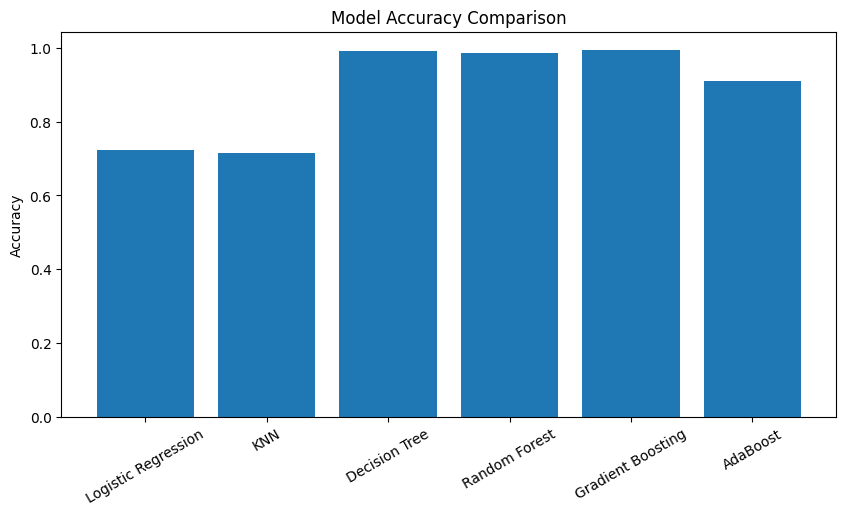

In [34]:
# ===============================
# 14. ACCURACY COMPARISON PLOT
# ===============================
plt.figure(figsize=(10,5))
plt.bar(results.keys(), results.values())
plt.xticks(rotation=30)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


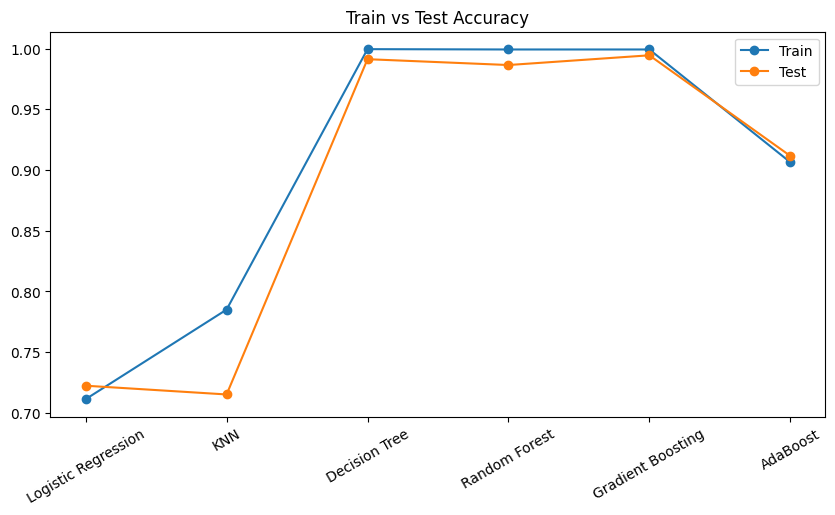

In [35]:
# ===============================
# 15. TRAIN vs TEST ACCURACY
# ===============================
train_acc, test_acc = [], []

for name, model in models.items():
    if name in ["Logistic Regression", "KNN"]:
        model.fit(X_train_scaled, y_train)
        train_acc.append(model.score(X_train_scaled, y_train))
        test_acc.append(model.score(X_test_scaled, y_test))
    else:
        model.fit(X_train, y_train)
        train_acc.append(model.score(X_train, y_train))
        test_acc.append(model.score(X_test, y_test))

plt.figure(figsize=(10,5))
plt.plot(models.keys(), train_acc, marker='o', label='Train')
plt.plot(models.keys(), test_acc, marker='o', label='Test')
plt.legend()
plt.xticks(rotation=30)
plt.title("Train vs Test Accuracy")
plt.show()


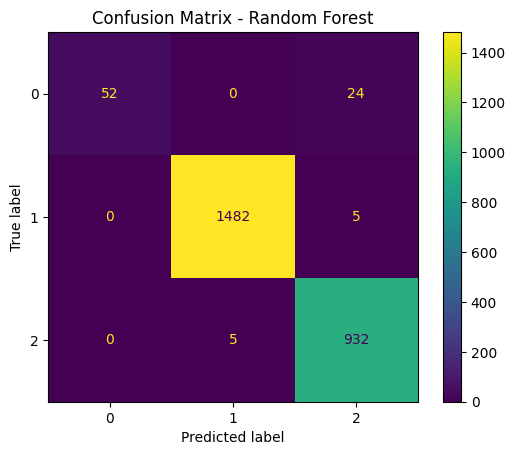

In [36]:
# ===============================
# 16. CONFUSION MATRIX (BEST MODEL)
# ===============================
best_model = RandomForestClassifier(
    n_estimators=100, max_depth=12, min_samples_split=10, random_state=42
)
best_model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()
